In [8]:
from PIL import Image
import csv
import os
from torch.utils.data import Dataset
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch


imagepath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DatasætDeeplearning/license_plates_detection_train/'
csvpath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DatasætDeeplearning/license_plates_detection_train.csv'
croppedImagesPath = 'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DatasætDeeplearning/croppedImages/'


In [5]:
class ImageData:
    def __init__(self, path, ymin, xmin, ymax, xmax):
        self.path = path
        self.xmin = xmin      
        self.ymin = ymin        
        self.xmax = xmax        
        self.ymax = ymax

In [6]:
def read_image_data():
    file = open(csvpath)
    csvreader = csv.reader(file)
    rows = []
    next(csvreader)
    for row in csvreader:
            id = ImageData(row[0], int(row[1]), int(row[2]), int(row[3]), int(row[4]))
            rows.append(id)
    file.close()
    return rows


In [7]:
os.makedirs(croppedImagesPath, exist_ok=True)

def crop_images():
    imageData = read_image_data()

    for id in imageData:
        im = Image.open(imagepath + id.path)
        im = im.crop( (id.xmin, id.ymin, id.xmax, id.ymax) )
        im.save(croppedImagesPath + id.path) 
        im.close()

crop_images()

In [9]:


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [35]:
transform=transforms.Compose([
    transforms.RandomCrop((12,12)),
    transforms.ToPILImage(),
    transforms.ToTensor(),
    #transforms.Normalize(0.4915,0.4823,0.4468)
])

In [38]:
test_dataset = CustomImageDataset(
    'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DatasætDeeplearning/license_plates_recognition_train.csv',
    'C:/Users/thoma/Documents/Softwareudvikling/Deep_learning/Eksamensprojekt/kode/DatasætDeeplearning/license_plates_recognition_train',
    transform=transform)

test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=True)

Feature batch shape: torch.Size([10, 3, 12, 12])
Labels batch shape: 10
('157T6832', '94T8974', '149T7951', '120T4640', '39T5898', '76T2714', '84T6404', '162T6108', '47T8151', '61T4573')


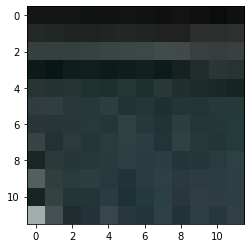

Label: 157T6832


In [39]:
# Display image and label.
train_features, train_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {len(train_labels)}")
img = train_features[0].squeeze()
label = train_labels[0]
print(train_labels)
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {label}")